<a href="https://colab.research.google.com/github/tuanymariiah/data_analysis/blob/main/analisando_dados_de_120_anos_de_olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O que 120 anos de olimpíadas podem nos falar?

Os jogos olímpicos atualmente é um dos eventos mais populares em todo o mundo, reunindo delegações com mais de 200 países em uma única cidade, pessoas se reúnem para acompanhar e torcer por seus respectivos países, sejam presencialmente nos estádios/arenas como também pela televisão. A origem das olimpíadas ocorreu por volta do século VIII a.C, na Grécia antiga, na cidade de Olímpia, por isso… Olimpíadas, (bastante criativo). Os cidadãos saiam de suas cidades natal para poder participar das competições.  Mas isso ainda é as olimpíadas da era antiga. Os jogos olímpicos da era moderna ocorreram pela primeira vez em 1896, 125 anos atrás, na Grécia.
Com uma história bem recheada de informações que podem nos informar, ver como este evento histórico tem mudado ao longo do tempo é bem interessante.

O dataset a ser analisado foi retirado do [kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results), e será feita a análise apenas dos jogos olímpicos de verão. Este dataset descrevem o nome, sexo, idade, altura peso, time, NOC, jogos, ano, season (verao ou inverno), cidade, esporte, evento (corresponde a sua especialidade) e por fim Medal (ouro, prata e bronze) de cada atlerta. Posteriormente, será criada outros 2 atributos como IMC e e Faixa de IMC, mas isso é cena para os próximos capítulos.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set()


In [2]:
#base='/content/drive/MyDrive/Projetos Pessoais/Portifólio/P[02] - analisando dados de 120 anos de olimpiadas/athlete_events.csv'
base = 'https://raw.githubusercontent.com/tuanymariiah/data_analysis/main/Bases/athlete_events.csv?token=AG2B7L63YEX3STJCJ53PRJLBBXY4Y'
base_olimpiadas = pd.read_csv(base)
base_olimpiadas = base_olimpiadas[base_olimpiadas['Season']=='Summer']
base_olimpiadas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


Cálculo de quantas colunas possuem valores nulos

Como podemos ver 4 colunas possuem valore nulos (ou vazios), são elas: 
* Age (idade)
* Height(Algura)
* Weight(Peso)
* Medal(medalhas)

Para resolver este problema, para o atributo idade, altura e peso, os valores foram preenchidos com a média em toda a coluna. E para a coluna de medalhas, foram excluídos os valores nulos.





In [3]:
base_olimpiadas.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

In [4]:
base_olimpiadas['Age'].fillna(base_olimpiadas['Age'].mean(), inplace=True)
#base_olimpiadas.dropna(subset=['Height', 'Weight'], inplace=True)
#base_olimpiadas['Height'].fillna(base_olimpiadas['Height'].mean(), inplace=True)#preferi substituir por -1
#base_olimpiadas['Weight'].fillna(base_olimpiadas['Height'].mean(), inplace=True)#preferi substituir por -1

#base_olimpiadas['Medal'].fillna(-1, inplace=True)#preferi substituir por -1


com mais nenhum valor nulo presente em nosso conjunto dataset, vamos analisar esta base, para isso tracei alguns pontos:

* Quantidade de homens e mulheres que participaram das olimpíadas, no geral
* Quantidade de homens e mulheres que participaram das olimpíadas, ao longo do tempo
* Idade desses respectivos atletas
* A faixa etária 
* Pessoa mais jovem a participar das olimpíadas
* Pessoa mais velha a participar das olimpíadas
* A primeira aparição das mulheres em olimpíadas, e qual esporte foi?
* A primeira mulher brasileira a participar das olimpíadas
* O quadro de medalhas no geral por gênero
* A quantidade de atletas por olimpíada
* A quantidade de atletas por esporte
* A classificação a partir do cálculo do IMC
* Eventos em que participaram os atletas classificados como obesos

Obviamente dá para fazer mais análises, mas isso fica para uma possível parte 2.


De acordo com o gráfico apresentado abaixo, podemos ver os homens participaram de mais olimpíadas que as mulheres

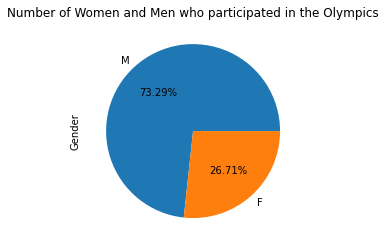

In [5]:
base_olimpiadas['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%');
plt.title('Number of Women and Men who participated in the Olympics');
plt.ylabel('Gender');

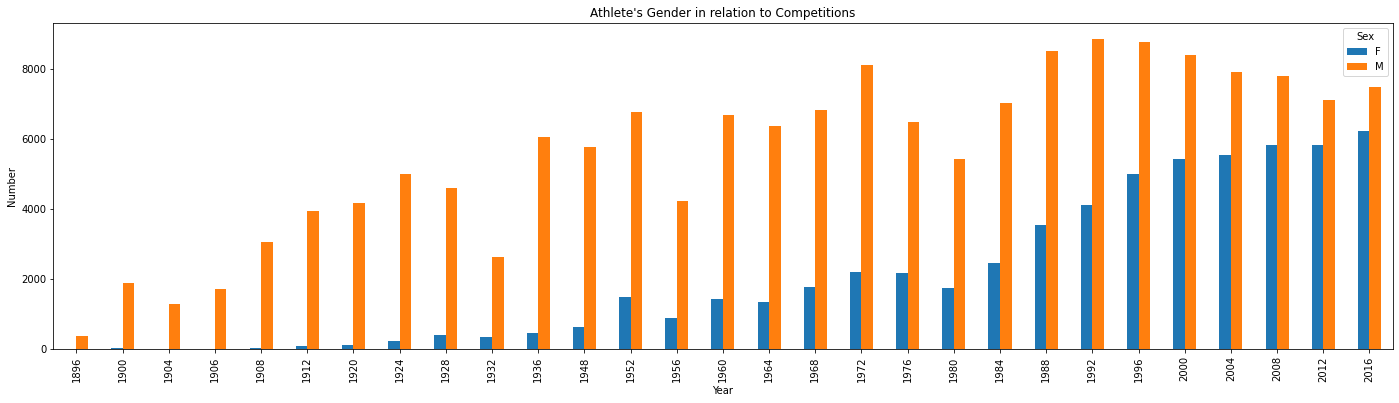

In [6]:
grupo_ano_genero = base_olimpiadas.groupby(['Year', 'Sex'])

grupo_ano_genero['ID'].count().unstack().plot(kind='bar', title="Athlete's Gender in relation to Competitions", figsize=[24, 6]);
plt.xlabel('Year');
plt.ylabel('Number');


Isso se deve também ao fato histórico, pois naquela época apenas homens podiam participar dos jogos. A primeira aparição das mulheres em olimpíadas foi em apenas em 1900. Já as mulheres brasileiras começaram a marcar presença nos jogos apenas em 1928, nas olimpíadas de Los Angeles, com a atleta da natação Maria Emma Hulka Zigler, conhecida como Maria Lenk, mas infelizmente a medalha não veio. A primeira medalha conquistada por mulheres só apareceu em 1996 no vôlei de praia.


Vamos  ver o que os dados dizem a respeito disso?

In [7]:
base_olimpiadas[base_olimpiadas['Name']=='Maria Emma Hulda Lenk Zigler']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
136660,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Freestyle,NaN
136661,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Backstroke,NaN
136662,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 200 metres Breaststroke,NaN
136663,68718,Maria Emma Hulda Lenk Zigler,F,21.0,168.0,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 200 metres Breaststroke,NaN


Como podemos ver, Maria Lenk, participou de apenas 2 olimpíadas, Los Angeles e Berlin.

Ainda vendo a quantidade de mulheres presentes em olimpíadas, no trecho de código abaixo, podemos ver que nas olimpiadas de 1896 as mulheres nao puderam competir, mas já nas olimpiadas de 1900 já podemos ver a presença das mulheres, yeeeeah!

In [8]:
print(base_olimpiadas[base_olimpiadas['Year']==1896]['Sex'].value_counts());
print(base_olimpiadas[base_olimpiadas['Year']==1900]['Sex'].value_counts());

M    380
Name: Sex, dtype: int64
M    1903
F      33
Name: Sex, dtype: int64


Observando a idade dos atletas, uma coisa possível de investigar é o atleta mais novo e o atleta mais velho dos jogos olímpicos. Com isso, o atleta mais novo a participar foi o ginasta Dimitrios Loundras com apenas 10 anos de idade, o jovem participou da primeira olimpíada da era moderna em 1896. Agora, a brasileira mais jovem a participar das olimpíadas é a nossa fadinha, Rayssa Leal, que conquistou a medalha de prata na modalidade de skate nas olimpíadas de Tóquio 2020(2021).
No gráfico abaixo, plotei a porcentagem dos atletas que competiram em olimpíadas, com isso conseguimos perceber que muitos adolescente participaram das olimpíadas.


In [9]:
base_olimpiadas[base_olimpiadas['Age']==base_olimpiadas['Age'].min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


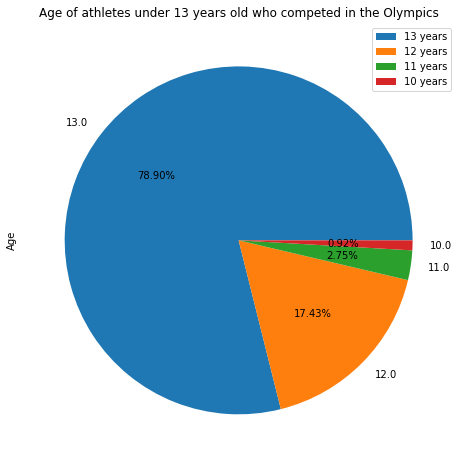

In [10]:
atletasmenores = base_olimpiadas[base_olimpiadas['Age']<=13].drop_duplicates(subset=['Name'], keep='last').sort_values(by=['Age'])['Age'].value_counts().plot(kind='pie',autopct='%.2f%%', figsize=[8, 8]);
plt.title('Age of athletes under 13 years old who competed in the Olympics');
plt.legend(['13 years', '12 years', '11 years', '10 years'],loc= 'upper right');

É estranho observar que tem uma pessoa idosa e morta participando de uma olimpíadas, mas a historia mostra que, John Quincy Adams Ward, faleceu em 1910 com 84 anos e participou das olimpiadas com 97, porém vivo não estava para presenciar esse feito. Mas o fato é que depois sua morte, apenas os quadros conservados participaram das olimpiadas de 1928. Interessante...!

Assim como para os atletas mais jovens, também quis investigar a quantidade de pessoas idosas que participaram das olimpíadas. Com isso, podemos ver que muitas pessoas idosas, a partir dos 60 anos, participaram das olimpíadas.

In [11]:
base_olimpiadas[base_olimpiadas['Age']==base_olimpiadas['Age'].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


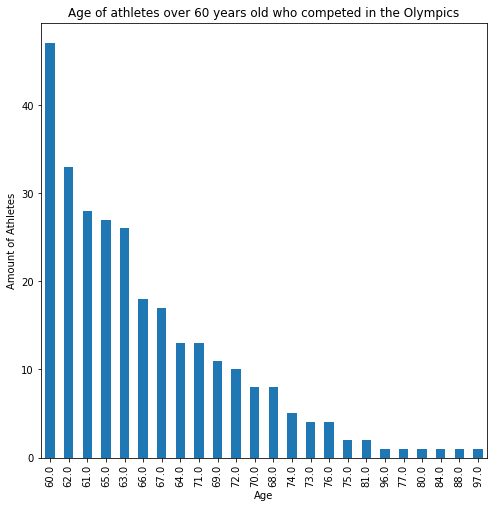

In [12]:
atletasmenores = base_olimpiadas[base_olimpiadas['Age']>=60].drop_duplicates(subset=['Name'], keep='last').sort_values(by=['Age'])['Age'].value_counts().plot(kind='bar', figsize=[8, 8]);
plt.title('Age of athletes over 60 years old who competed in the Olympics');
plt.xlabel('Age');
plt.ylabel("Amount of Athletes");

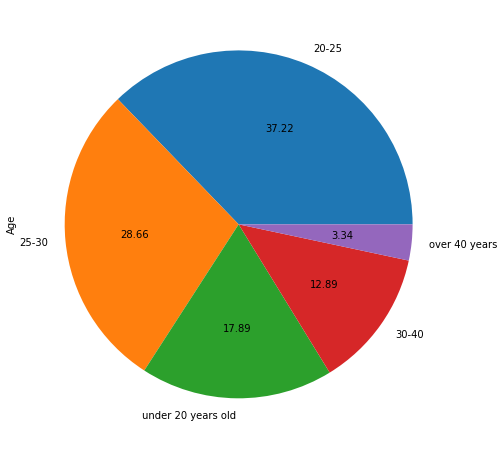

In [13]:
faixa_etaria = pd.cut(base_olimpiadas.Age, bins=[0, 20, 25, 30, 40, 100], labels=['under 20 years old', '20-25', '25-30', '30-40', 'over 40 years'])
faixa_etaria.value_counts().plot(kind='pie',autopct='%.2f', figsize=[8, 8]);
#plt.legend(['20-25 years', '25-30 years','under 20 years old','30-40 years','over 40 years'],loc= 'upper right');


Também é interessante observar o crescimento e a quantidade de atletas que participaram das olimpíadas desde de 1896, com isso podemos perceber que houve um aumento constante desde das olimpíadas de 1996.

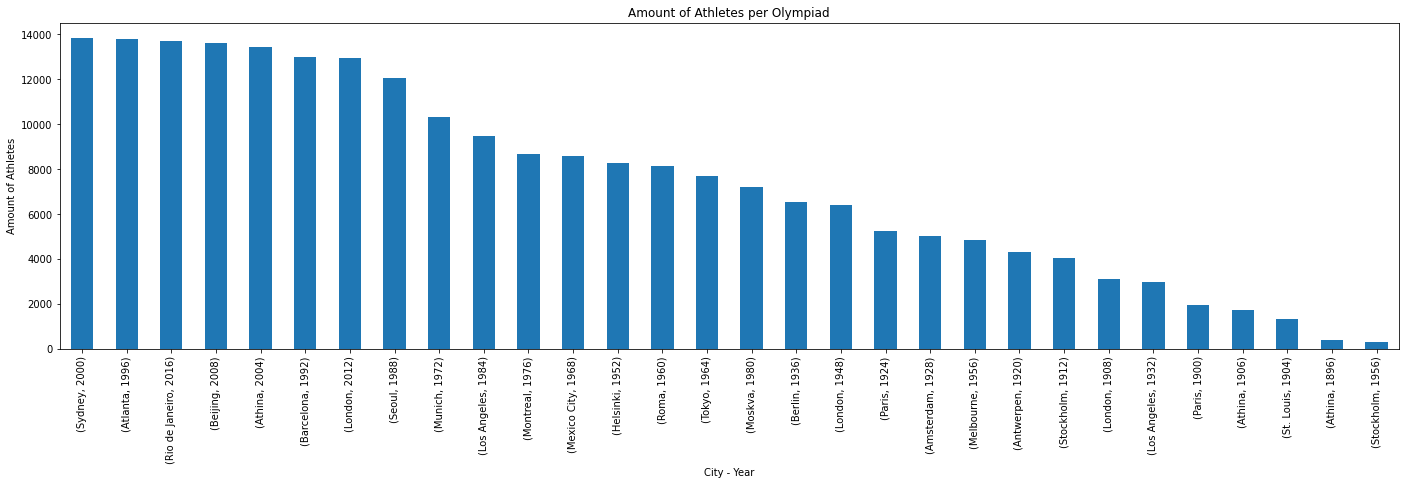

In [14]:
grupodecidades = base_olimpiadas.groupby(['City', 'Year'])['City'].count()
grupodecidades.nlargest(50).plot(kind='bar', title='Amount of Athletes per Olympiad',figsize=(24, 6));
plt.ylabel('Amount of Athletes');
plt.xlabel('City - Year');

A seguir podemos ver a quantidade de atletas brasileiros e seus respectivos esportes, com o gráfico abaixo, podemos ver existe uma maior quantidade de atletas do futebool, volei, basquete e atletismo, são bastants frequentes, seguidos do vôlei e futebol, mas veja... é so a participaçao e não a premiação em olimpíadas.

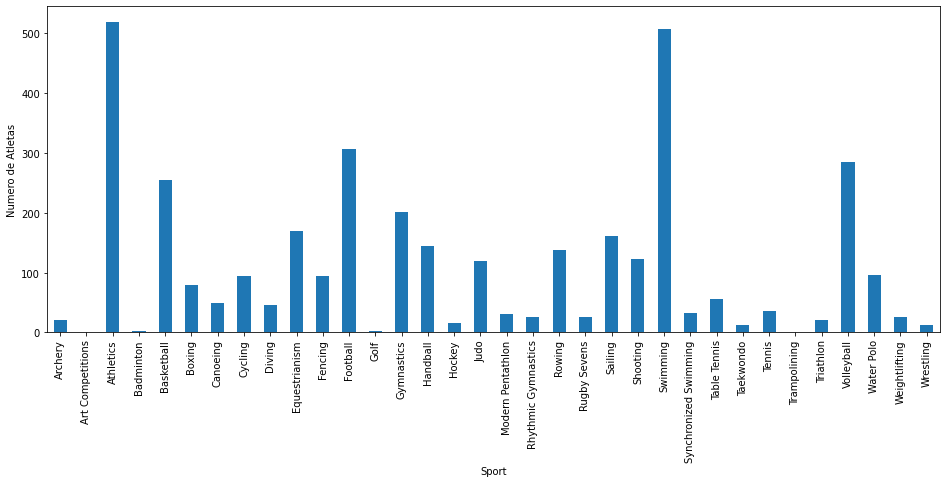

In [15]:
#
natacao_pais = base_olimpiadas.groupby(['Team', 'Sport'])['Team'].count()
natacao_pais.Brazil.plot(kind='bar',figsize=(16, 6))
plt.ylabel('Numero de Atletas');

Ao decorrer das olimpíadas, foram concedidas ao todo quantas medalhas?

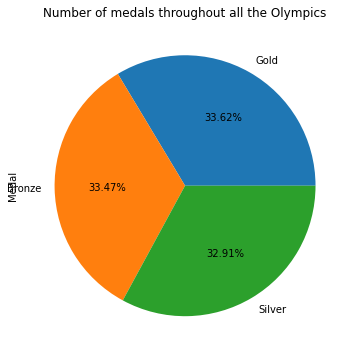

In [16]:
base_olimpiadas[base_olimpiadas['Medal']!=-1]['Medal'].value_counts().plot(kind='pie',title='Number of medals throughout all the Olympics',autopct='%.2f%%', figsize=[6, 6]);

#plt.legend(['Gold', 'Silver','Bronze'],loc= 'upper right');


E por gênero, quantas medalhas tantos os homens quanto as mulheres receberam?

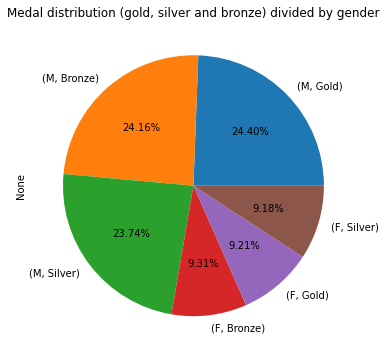

In [17]:
base_olimpiadas.dropna(subset=['Medal'], inplace=True)

base_olimpiadas[['Sex','Medal']].value_counts().plot(kind='pie', title='Medal distribution (gold, silver and bronze) divided by gender',autopct='%.2f%%', figsize=[6, 6]);

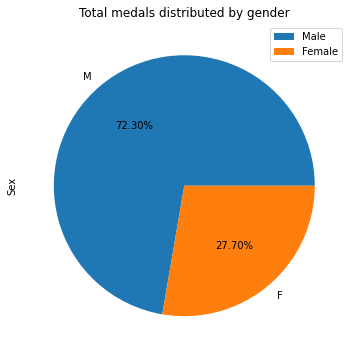

In [18]:
base_olimpiadas[base_olimpiadas['Medal']!=-1]['Sex'].value_counts().plot(kind='pie',title='Total medals distributed by gender',autopct='%.2f%%', figsize=[6, 6]);

plt.legend(['Male', 'Female'],loc= 'upper right');


De acordo com o gráfico, podemos ver que a quantidade de mulheres e de homens que receberam medalhas ao longo das olimpíadas, se assemelha a quantidade de homens e mulheres que marcaram presença nas olimpíadas

Observando o dataset, podemos ver que existem dois atributos, altura e peso. Que a partir deles podemos fazer o cálcudo do imc, que é calculado da seguinte forma:

IMC = peso/ altura*altura

pra isso, como peso e altura tem muitos dados faltosos, preferi excluir esses valores, para que podemos ter valores reais sobre cada atleta 

In [19]:
base_olimpiadas.dropna(subset=['Height', 'Weight'], inplace=True)

base_olimpiadas['Height'] = base_olimpiadas['Height'].astype(int)
base_olimpiadas['Weight'] = base_olimpiadas['Weight'].astype(int)

def calcula_imc(registro):
  return registro['Weight']/(registro['Height']*registro['Height'])*10000
   
base_olimpiadas['IMC'] = base_olimpiadas.apply(calcula_imc, axis=1)


Uma vez que calculamos o IMC dos Atletas, também vimos a faixa de cada valor como Magreza, Normal, Sobrepeso e Obesidadde segundo o site [Tua Saude](https://www.tuasaude.com/calculadora/imc/)

In [20]:
def faixaimc(registro):
    if registro['IMC'] < 18.5:
        return 'Magreza'
    elif registro['IMC'] >=18.5 and registro['IMC']<24.9:
        return 'Normal'
    elif registro['IMC'] >=24.9 and registro['IMC']<30:
        return 'Sobrepeso'
    elif registro['IMC'] >=30:
        return 'Obesidade'


base_olimpiadas['Faixa_IMC'] = base_olimpiadas.apply(faixaimc, axis=1)


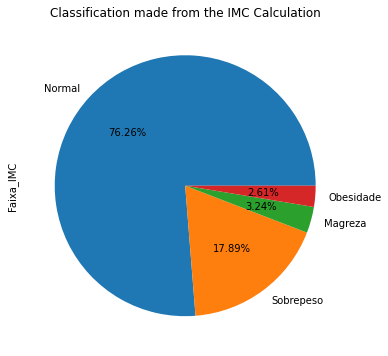

In [23]:
base_olimpiadas['Faixa_IMC'].value_counts().plot(kind='pie',autopct='%.2f%%',  figsize=[6, 6]);
plt.title('Classification made from the IMC Calculation');
#plt.legend(['Normal', 'Sobrepeso','Magreza','Obesidade']);


Agora seria legal investigar em quais esportes possuem atletas obesos

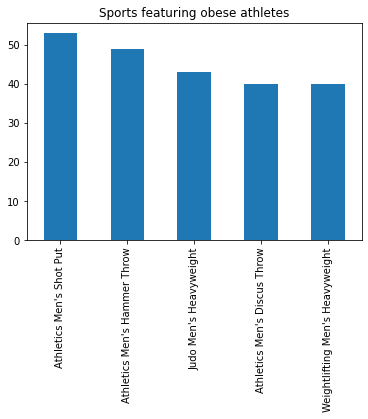

In [24]:
base_olimpiadas[base_olimpiadas['Faixa_IMC']=='Obesidade']['Event'].value_counts().head().plot(kind='bar', title='Sports featuring obese athletes');

De acordo com o grafico apresentado, os atletas que possuem obesidade, so os atletas que pertencem aos esportes como judo, levantamento de peso, lancamento de discos e arremesso de peso

